In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [5]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [8]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [9]:
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [10]:
df['seniority']=df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [11]:
#Fix state Los Angeles

df['job_state']=df.job_state.apply(lambda x:x.strip() if x.strip().lower() !='los angeles' else 'CA')

In [12]:
df['Competitors'].unique()

array(['-1',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'Commerce Signals, Cardlytics, Yodlee',
       'Digital Realty, CoreSite, Equinix', 'Clicktripz, SmarterTravel',
       'Target, Costco Wholesale, Amazon', 'Novartis, Baxter, Pfizer',
       'bluebird bio, Agios Pharmaceuticals, Celgene',
       "Angie's List, HomeAdvisor, Thumbtack",
       'Leidos, CACI International, Booz Allen Hamilton',
       'Thermo Fisher Scientific, Enzymatics, Illumina', 'Pitney Bowes',
       'BrowserStack, Selenium Master, Perfecto Mobile',
       'Unilever, Procter & Gamble, Henkel',
       'UDR, AvalonBay Communities, Essex Property Trust',
       'American Express, Mastercard, Discover',
       'TASC, Vencore, Booz Allen Hamilton',
       'John Deere, Komatsu, CNH Industrial',
       'Travelers, Allstate, State Farm', 'Munich Re, Hannover RE, SCOR',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Slalom, Daugherty Busines

In [13]:
#competitor count

df['num_comp'] = df['Competitors'].apply(lambda x:len(x.split(',')) if x!=(-1) else 0)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,47,1,0,0,0,1,data scientist,na,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,36,1,0,0,0,0,data scientist,na,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,10,1,0,1,0,1,data scientist,na,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,55,1,0,0,0,0,data scientist,na,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,22,1,0,0,0,1,data scientist,na,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,0,190,0,0,0,1,0,na,senior,3
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,0,14,1,0,1,1,0,data engineer,senior,3
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,1,36,0,0,0,0,1,na,na,1
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,0,-1,0,0,0,0,1,manager,na,1


In [14]:
df['company_txt'] = df['company_txt'].apply(lambda x:x.replace('\n',''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [15]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,1.673854
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'num_comp'],
      dtype='object')

<AxesSubplot:>

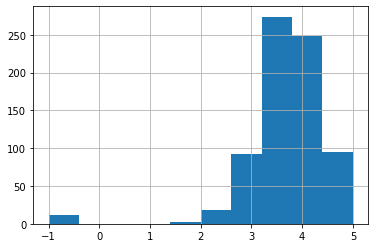

In [17]:
df.Rating.hist()

<AxesSubplot:>

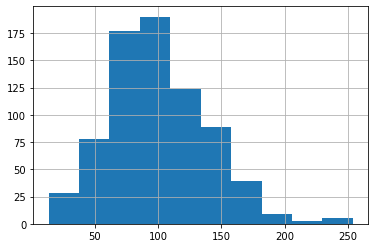

In [18]:
df.avg_salary.hist()

<AxesSubplot:>

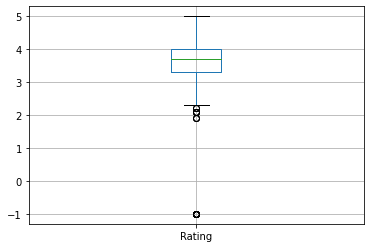

In [19]:
df.boxplot(column = 'Rating')

<AxesSubplot:>

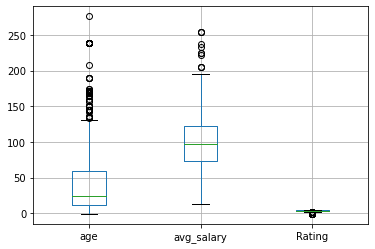

In [20]:
column = ['age','avg_salary','Rating']

df.boxplot(column = column)

In [21]:
df['age'].unique()

array([ 47,  36,  10,  55,  22,  20,  12,  15,   6,  11,   9,  52,  58,
         8, 239,  25, 105,   7,  85, 171,  68, 168,  23,  24,  46,  51,
       150,  35,  -1,   5,  27,  62,  34,  21,  95, 108,  18, 157,  81,
         4, 135,  14,  72,  17,  93,  42, 160,   3,  78,  30,  32,  19,
        13,  28,  26,  43,   1,  38,  83, 142,  54,  49,  77,  33,  75,
       174, 169,  44,  39,  50,  69,  53,  59,  56,  90, 103, 137, 133,
        16, 170, 118, 276,  91,  73,  29,  31,  92, 145, 107,  48, 164,
        37,  98, 208, 106,  40,  66, 190,  45, 121,  41, 131], dtype=int64)

In [22]:
df[['age','avg_salary','Rating']].corr()

#it will give the correlation between the various parameters

,age,avg_salary,Rating
age,1.000000,0.019655,0.021655
avg_salary,0.019655,1.000000,0.013492
Rating,0.021655,0.013492,1.000000


<AxesSubplot:>

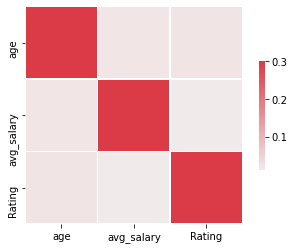

In [23]:
import seaborn as sns
cmap= sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating']].corr(),vmax=.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'num_comp'],
      dtype='object')

In [25]:
df_cat = df[['Size','Location','Headquarters','company_txt',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'same_state','python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

In [26]:
df_cat.columns

Index(['Size', 'Location', 'Headquarters', 'company_txt', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'job_state', 'same_state', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority'],
      dtype='object')

In [27]:
df_cat['Location'].value_counts().index

Index(['New York, NY', 'San Francisco, CA', 'Cambridge, MA', 'Chicago, IL',
       'Boston, MA', 'San Jose, CA', 'Pittsburgh, PA', 'Washington, DC',
       'Rockville, MD', 'Richland, WA',
       ...
       'Port Washington, NY', 'Longmont, CO', 'Santa Barbara, CA',
       'Cambridge, MD', 'Foster City, CA', 'Meridian, ID', 'Waltham, MA',
       'Sheboygan, WI', 'Southfield, MI', 'Glen Burnie, MD'],
      dtype='object', length=200)

In [28]:
import matplotlib.pyplot as plt

graph for Size:total =9


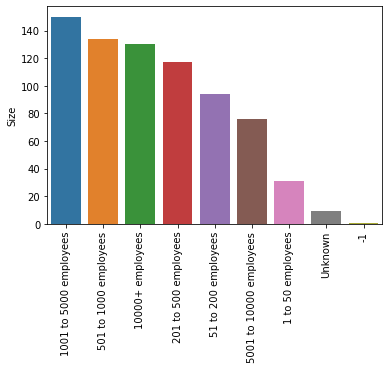

graph for Location:total =200


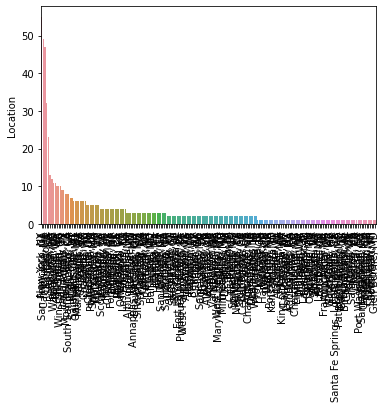

graph for Headquarters:total =198


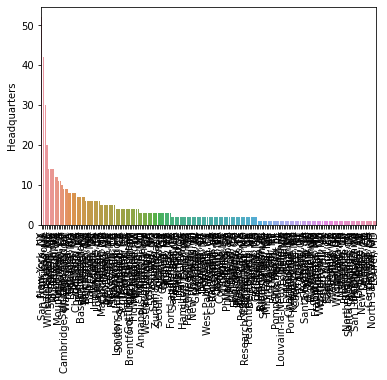

graph for company_txt:total =343


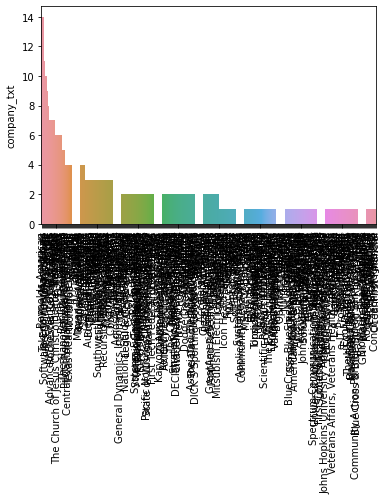

graph for Type of ownership:total =11


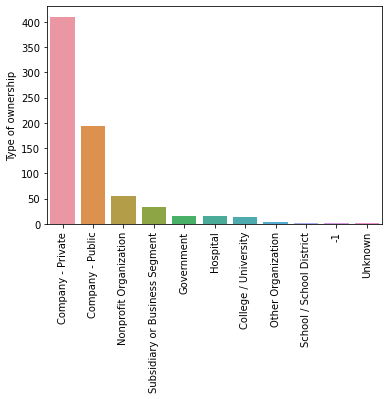

graph for Industry:total =60


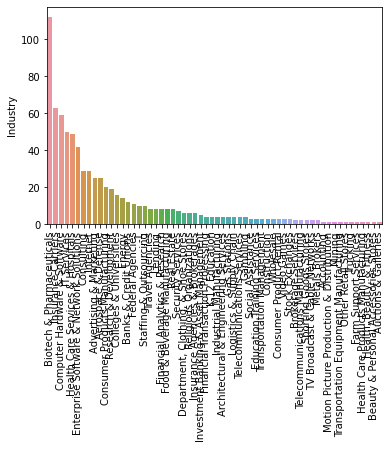

graph for Sector:total =25


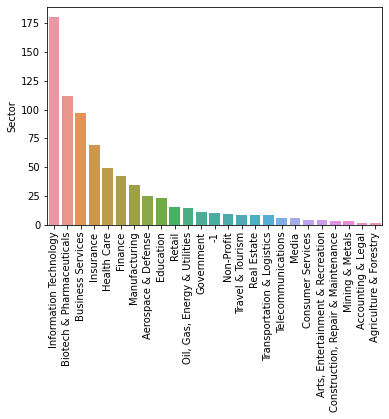

graph for Revenue:total =14


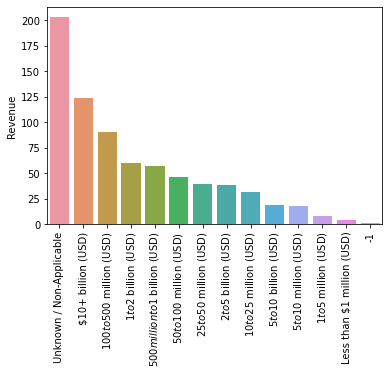

graph for job_state:total =37


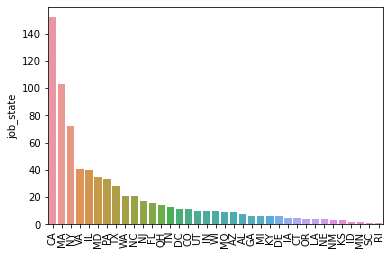

graph for same_state:total =2


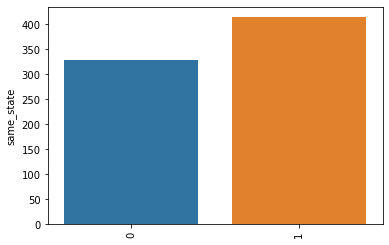

graph for python_yn:total =2


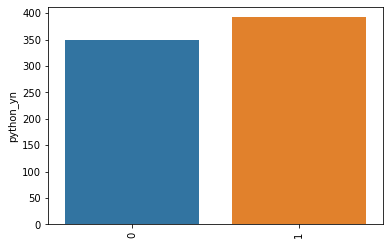

graph for R_yn:total =2


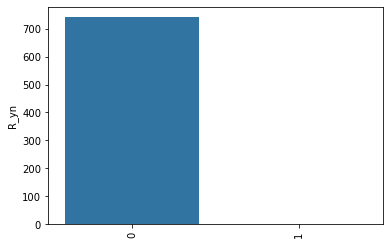

graph for spark:total =2


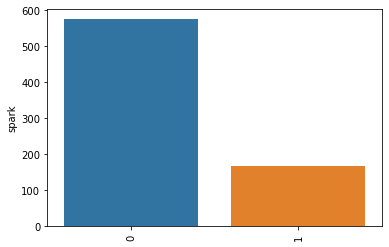

graph for aws:total =2


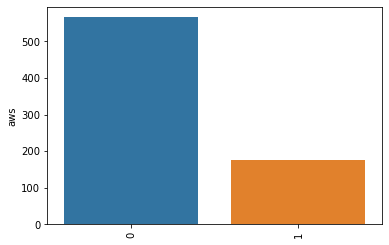

graph for excel:total =2


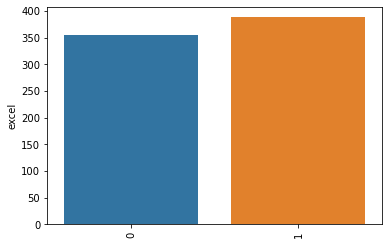

graph for job_simp:total =7


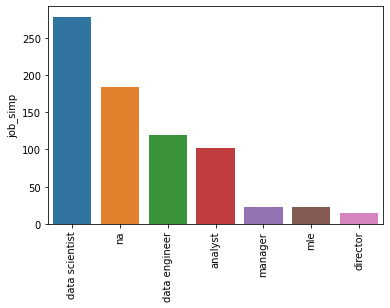

graph for seniority:total =3


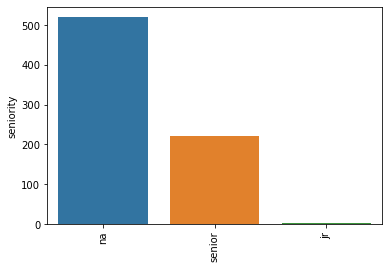

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s:total =%d"%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index , y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for Location:total =20


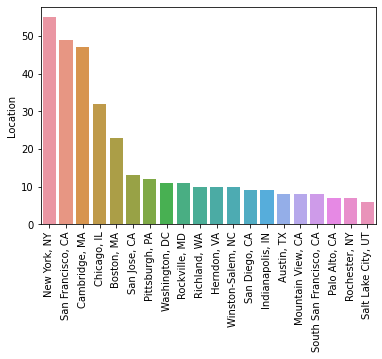

graph for Headquarters:total =20


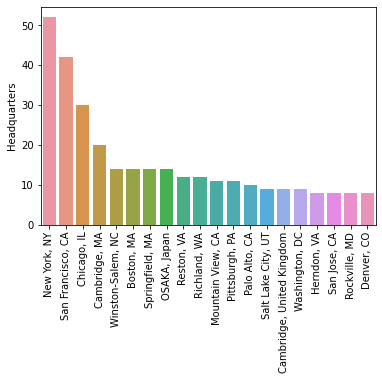

graph for company_txt:total =20


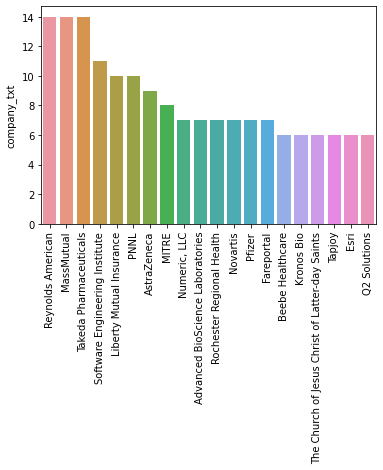

In [30]:
for i in df_cat[['Location','Headquarters','company_txt']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s:total =%d"%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index , y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [31]:
df_cat[i].value_counts()[:20]

Reynolds American                                  14
MassMutual                                         14
Takeda Pharmaceuticals                             14
Software Engineering Institute                     11
Liberty Mutual Insurance                           10
PNNL                                               10
AstraZeneca                                         9
MITRE                                               8
Numeric, LLC                                        7
Advanced BioScience Laboratories                    7
Rochester Regional Health                           7
Novartis                                            7
Pfizer                                              7
Fareportal                                          7
Beebe Healthcare                                    6
Kronos Bio                                          6
The Church of Jesus Christ of Latter-day Saints     6
Tapjoy                                              6
Esri                        

In [32]:
pd.pivot_table(df,index =['job_simp','seniority'],values='avg_salary').sort_values('avg_salary',ascending=False)

avg_salary
job_simp       seniority            
director       na         168.607143
mle            senior     142.071429
data scientist senior     138.956522
data engineer  senior     124.689189
mle            na         119.133333
na             senior     109.061404
data scientist na         107.043011
               jr         106.500000
data engineer  na          96.701220
manager        na          84.022727
analyst        senior      79.092593
na             na          73.988189
analyst        na          61.155405
               jr          56.500000

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'num_comp'],
      dtype='object')

In [34]:
df_pivot=df[['Location', 'Headquarters', 
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 
       'hourly', 'employer_provided', 
        'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'num_comp','avg_salary']]

In [35]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Location
                     avg_salary
Location                       
Bellevue, WA           184.5000
Lake Forest, IL        179.5000
Mountain View, CA      177.1875
Novato, CA             168.0000
Burbank, CA            164.0000
...                         ...
Lewes, DE               27.5000
Millville, DE           27.5000
Burleson, TX            21.5000
West Reading, PA        20.5000
Port Washington, NY     15.5000

[200 rows x 1 columns]
Headquarters
                       avg_salary
Headquarters                     
Fremont, CA            225.000000
Lake Forest, IL        179.500000
Burbank, CA            164.000000
Mill Valley, CA        162.000000
Mountain View, CA      158.818182
...                           ...
Englewood, CO           25.000000
Arlington, TX           21.500000
Reading, PA             20.500000
Port Washington, NY     15.500000
Peachtree Corners, GA   13.500000

[198 rows x 1 columns]
Type of ownership
                                avg_salary
Type of own

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [36]:
pd.pivot_table(df_pivot,index='Revenue',columns ='python_yn',values='avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [37]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [42]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

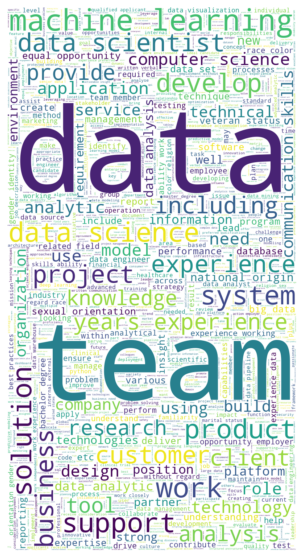

In [45]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()